In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import datetime as dt
from chart_studio import plotly
import plotly.offline as of
%matplotlib inline

In [3]:
of.init_notebook_mode(connected=True)
cf.go_offline()

# Importing datafiles

In [4]:
donations = pd.read_csv('Donations.csv')

In [5]:
projects = pd.read_csv('Projects.csv')
resources = pd.read_csv('Resources.csv')

In [6]:
schools = pd.read_csv('Schools.csv')

In [7]:
teachers = pd.read_csv('Teachers.csv')

In [8]:
donors = pd.read_csv('Donors.csv')

C:\Users\diwan\AppData\Local\Temp\ipykernel_2628\2554752271.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



# Shortview of Data 

In [9]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [10]:
projects.head(3)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22


In [11]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [12]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [13]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [14]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


# Creating New Data by merging the datasets

In [15]:
data = pd.merge(donations, projects, how='inner', on = 'Project ID')

In [16]:
data2 = pd.merge(data, donors, how = 'inner', on = 'Donor ID')

In [17]:
data3 = pd.merge(data2, schools, how = 'inner', on = 'School ID')

In [18]:
data4 = pd.merge(data3, teachers, how = 'inner', on = 'Teacher ID')

In [19]:
data4.columns.values.tolist()

['Project ID',
 'Donation ID',
 'Donor ID',
 'Donation Included Optional Donation',
 'Donation Amount',
 'Donor Cart Sequence',
 'Donation Received Date',
 'School ID',
 'Teacher ID',
 'Teacher Project Posted Sequence',
 'Project Type',
 'Project Title',
 'Project Essay',
 'Project Short Description',
 'Project Need Statement',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'School Name',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District',
 'Teacher Prefix',
 'Teacher First Project Posted Date']

In [20]:
data4.head(3)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,School ID,Teacher ID,Teacher Project Posted Sequence,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
1,3cd4f1c5cfa0d495dadfead3153c936d,21aaadfba0becc3f052decf88cd31a75,1f4b5b6e68445c6c4a0509b3aca93f38,No,148.29,25,2017-03-30 01:34:18,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,11,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
2,8d9e1ec79b729185b7c61c6b57710b0d,1e20c3d1bce4a3def3a454868d29af30,1f4b5b6e68445c6c4a0509b3aca93f38,No,88.28,46,2017-10-19 17:59:52,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,19,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19


# Analysis

### Top 10 states having the most number of schools that opened projects to gather donations? 

Plotting data using Bar Plot

In [21]:
s = schools['School State'].value_counts().sort_values(ascending=False).head(10)


In [22]:
s.iplot(kind='bar', xTitle='State', yTitle='No. of School', title='Top 10 states with most number of schools')

### Top 10 states where schools gathered most amount of Average Donations?

Plotting data using Bar Plot

In [23]:
t = data4.groupby('School State')['Donation Amount'].mean().sort_values(ascending=False).head(10)
t

School State
Wyoming                 130.232248
Hawaii                   95.364167
Massachusetts            77.926463
Rhode Island             72.429974
District of Columbia     70.693202
North Dakota             69.777091
Washington               69.161616
New Jersey               68.586876
Montana                  67.186760
Alaska                   66.990084
Name: Donation Amount, dtype: float64

In [24]:
t.iplot(kind='bar', xTitle='State', yTitle='Average Donations', title='Top 10 states with most amount of Average Donations')

### Maximum, Minimum, Mean, Median, 25 and 75 percentiles of Donations

In [25]:
mean = np.mean(data4['Donation Amount'].dropna())
median = np.median(data4['Donation Amount'].dropna())
percentiles = np.percentile(data4['Donation Amount'].dropna(),[25,75])
minimum = data4['Donation Amount'].dropna().min()
maximum = data4['Donation Amount'].dropna().max()
print('Minimum Donations :',minimum)
print('Maximum Donations :',maximum)
print('Mean Donations :',round(mean,2))
print('Median Donations :',median)
print('25% and 75% Donations :',percentiles[0],'|',percentiles[1])

Minimum Donations : 0.01
Maximum Donations : 60000.0
Mean Donations : 61.03
Median Donations : 25.0
25% and 75% Donations : 15.0 | 50.0


We can observe from above statistics that our Donations Amount column have lots of outliers since mean is 60 whereas median is 25 which shows that there are plenty of outliers causing mean to rise

Second indicator is that we have 25th and 75th percentiles both lower than mean. In other words although 75 percent of our data smaller than 50 we have a mean values which is 60.66 which is also a good indicator of outliers.

Lastly we can easily say that maximum value is a huge outlier too.


### In which percent the data has points greater or smaller than the values shown in the x axis

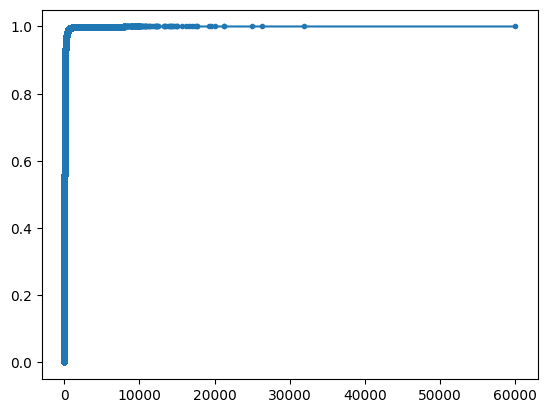

In [26]:
x = np.sort(data4['Donation Amount'].dropna())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker = '.')

### In which states there are more donations done by donors

In [27]:
p = data4.groupby('Donor State')['Donation ID'].count().sort_values(ascending=False).head(15)
p

Donor State
California        693577
New York          350553
Texas             271348
Illinois          230350
Florida           229542
North Carolina    194465
other             184324
Pennsylvania      148752
Georgia           147897
Massachusetts     136845
Michigan          119337
Indiana           117470
Virginia          111740
New Jersey        109926
Ohio              107401
Name: Donation ID, dtype: int64

In [28]:
p.iplot(kind='area', xTitle='State', yTitle='Donations by Donors', title='States with more donations done by donors',fill=True,color = 'red')

Now, it is time for a more advanced question 

### Is there a relationship between the number of projects offered and number of donations made by the donors?   Which states performing better in this case?   
### How many of them responding project requests below average and which states are performing best in terms of donations per project?

In order to answer this question we must first get the number of projects per state and then number of donations made per state. Then we should merge this two and plot a scatter plot to visualize it. Lets do it!


In [29]:
po = schools['School State'].value_counts()
do = data4.groupby('Donor State')['Donation ID'].count()
df = pd.concat([po,do],axis=1,keys=['Projects','Donations'])
df.dropna(inplace=True)
df.head()

,Projects,Donations
California,8457.0,693577
Texas,6485.0,271348
New York,3819.0,350553
Florida,3302.0,229542
Illinois,3126.0,230350


In [30]:
df.iplot(kind='scatter',xTitle='States', yTitle='Value',title='Projects vs Donations Statewise',symbol='4',mode='markers',colorscale='paired')

Linear Relation 

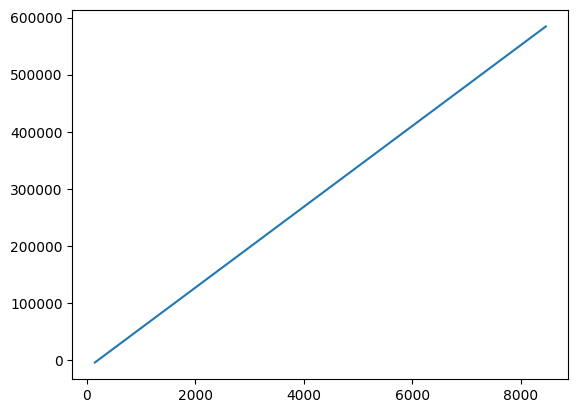

In [31]:
slope, intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
y = slope*x+intercept
plt.plot(x,y)

Scatter 

<Axes: xlabel='Projects', ylabel='Donations'>

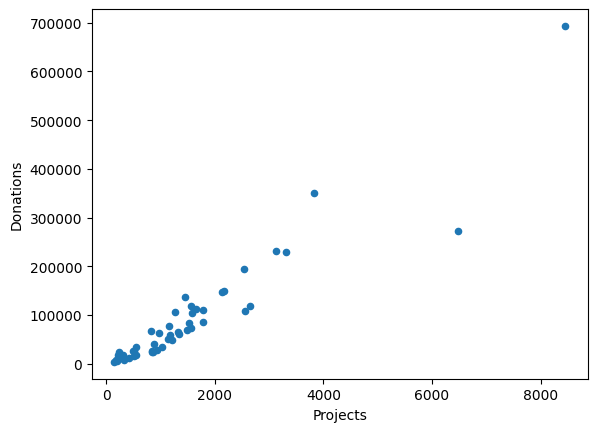

In [32]:
df.plot.scatter(x='Projects',y='Donations')

Combined Plot

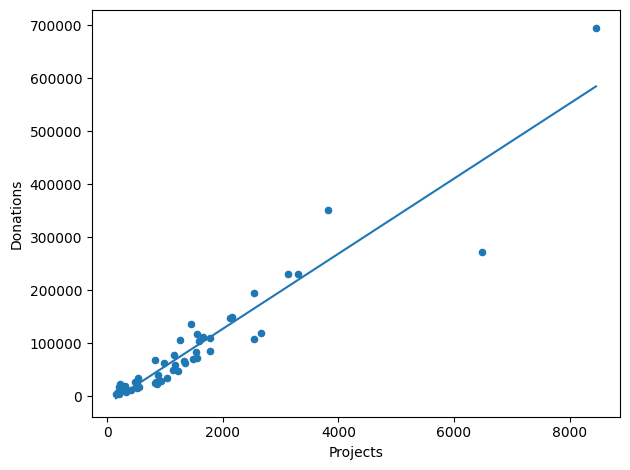

In [33]:
df.plot.scatter(x='Projects',y='Donations')
slope, intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
y = slope*x+intercept
plt.plot(x,y)
plt.tight_layout()
plt.margins(0.05)

### How many different Project types exists?

### What is the total donation amount for each of them?

In [34]:
ptype = projects['Project Type'].value_counts()
ptype

Project Type
Teacher-Led                 1092163
Professional Development      10235
Student-Led                    7619
Name: count, dtype: int64

In [35]:
damt = data4['Donation Amount'].groupby(data4['Project Type']).sum().astype(int)
damt

Project Type
Professional Development      2474442
Student-Led                   2711059
Teacher-Led                 276046773
Name: Donation Amount, dtype: int32

### How many Project Subject Category trees exists? 

### Which one have most donations?

In [36]:
data4['Project Subject Category Tree'].nunique()

51

In [37]:
md = data4.groupby('Project Subject Category Tree')['Donation Amount'].sum().astype(int).sort_values(ascending=False).head(15)
md.iplot(kind='bar',xTitle='Project Subject Category', yTitle='Donation Amount',color='green',title='Donation Amount by Project Subject',colorscale='paired')

### What is the mean time that takes a project to be fully funded after posted and how it varies between states?


Clearing Data



In [38]:
data4[['Project Posted Date','Project Fully Funded Date']].head()

,Project Posted Date,Project Fully Funded Date
0,2016-05-13,2016-08-23
1,2017-03-18,2017-03-30
2,2017-10-18,2017-10-19
3,2017-11-27,2018-01-25
4,2016-09-05,2016-12-22


In [39]:
data4['Project Posted Date'] = pd.to_datetime(data4['Project Posted Date'])
data4['Project Fully Funded Date'] = pd.to_datetime(data4['Project Fully Funded Date'])

In [40]:
data4['Funding Time'] = data4['Project Fully Funded Date']-data4['Project Posted Date']
data4[['Funding Time','Project Posted Date','Project Fully Funded Date']].head()

,Funding Time,Project Posted Date,Project Fully Funded Date
0,102 days,2016-05-13,2016-08-23
1,12 days,2017-03-18,2017-03-30
2,1 days,2017-10-18,2017-10-19
3,59 days,2017-11-27,2018-01-25
4,108 days,2016-09-05,2016-12-22


In [41]:
data5 = data4[pd.notnull(data4['Funding Time'])]
data5[['Funding Time','Project Posted Date','Project Fully Funded Date']].isnull().sum()   

Funding Time                 0
Project Posted Date          0
Project Fully Funded Date    0
dtype: int64

In [42]:
data5['Funding Time'] = data5['Funding Time'].dt.days
data5[['Funding Time','Project Posted Date','Project Fully Funded Date']].head()

,Funding Time,Project Posted Date,Project Fully Funded Date
0,102,2016-05-13,2016-08-23
1,12,2017-03-18,2017-03-30
2,1,2017-10-18,2017-10-19
3,59,2017-11-27,2018-01-25
4,108,2016-09-05,2016-12-22


In [43]:
overall_mean_time = data5.groupby('Project ID')['Funding Time'].mean()
overall_mean_time.mean()

32.171606457403584

Average funding time for states

In [44]:
state_time = data5.groupby(['School State','Project ID'])['Funding Time'].mean()
state_time

School State  Project ID                      
Alabama       00002d44003ed46b066607c5455a999a     41.0
              000e336c167aae4394ac037e002aa2b9     58.0
              00105d1128dbbf4e0774804052b5bedb     27.0
              0014d0f8aa7dbbd5705956d7458a0d9f     15.0
              001a70c8fdb47880cbcde5675193b877     18.0
                                                  ...  
Wyoming       fe83942b407a1f868cb48b2bbeab4988     23.0
              febb789ba78badf633114020f1483392      2.0
              ff1d119bac584ec35d3740f83f3daa7d    112.0
              ff43f8665a9ed6a009f395b18d96734a     64.0
              ffbcf2e301bd4b2e80dc9faea5b02a57    110.0
Name: Funding Time, Length: 720847, dtype: float64

In [45]:
state_avg_time = state_time.groupby('School State').mean()
state_avg_time

School State
Alabama                 35.770413
Alaska                  33.512095
Arizona                 34.610669
Arkansas                35.418031
California              31.570080
Colorado                30.679767
Connecticut             32.215966
Delaware                32.707317
District of Columbia    25.650732
Florida                 31.195464
Georgia                 34.654780
Hawaii                  26.755855
Idaho                   31.117762
Illinois                29.569604
Indiana                 32.288467
Iowa                    36.733848
Kansas                  31.315844
Kentucky                32.963945
Louisiana               35.873359
Maine                   35.331593
Maryland                32.497738
Massachusetts           31.516423
Michigan                31.958958
Minnesota               30.862021
Mississippi             36.771672
Missouri                31.190542
Montana                 31.049285
Nebraska                36.276308
Nevada                  35.230611
N

In [46]:
state_avg_time.iplot(kind='area',xTitle='State',yTitle='Days to Complete Funding',fill=True,title='Time taken by states to complete Funding',color='pink')

Which States are the best and which are the worst performing (as of mean project fully funded time = 32) ? 

In [47]:
worst = state_avg_time[state_avg_time<overall_mean_time.mean()].sort_values().head(10)
print('Worst Performing States:\n\n ',worst)
worst.iplot(kind='bar',xTitle='States',yTitle='Fully Funding Time(days)',color='black')

Worst Performing States:

  School State
District of Columbia    25.650732
Hawaii                  26.755855
Wyoming                 29.485876
Illinois                29.569604
Oregon                  30.382247
Vermont                 30.414525
Colorado                30.679767
Minnesota               30.862021
Pennsylvania            30.972778
Wisconsin               31.030586
Name: Funding Time, dtype: float64


In [48]:
best = state_avg_time[state_avg_time>overall_mean_time.mean()].sort_values(ascending=False).head(10)
print('Best Performing States:\n\n',best)
best.iplot(kind='bar',xTitle='States',yTitle='Fully Funding Time(days)',color='#966F33')

Best Performing States:

 School State
Mississippi      36.771672
Iowa             36.733848
Nebraska         36.276308
West Virginia    36.063702
Utah             36.011021
Louisiana        35.873359
Alabama          35.770413
Arkansas         35.418031
Maine            35.331593
Nevada           35.230611
Name: Funding Time, dtype: float64


END FOR NOW ☮